In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from numpy.random import rand
import matplotlib.pylab as plt

In [82]:
import pandas as pd
#df = pd.read_hdf('/home/ubuntu/data/wells/1_1.h5', 'data')
#df = pd.read_hdf('/home/ubuntu/data/wells/2_26.h5', 'data')
```
print (df.shape)

(1794, 5)


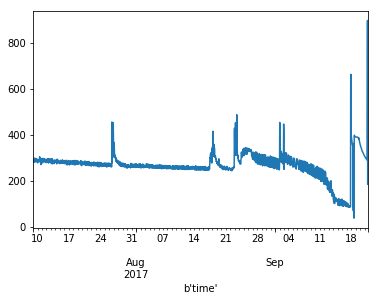

In [83]:
df['PINP'].plot()
plt.show()

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
from numpy.random import rand
import matplotlib.pylab as plt

def RandSmpl(data, n_minutes, m_samples):
    for i in range(0, m_samples):
        indx = np.floor(rand(n_minutes//10) * data.shape[0] )
        smp = data.iloc[indx]       
        yield smp        

def RandSmplSeq(data, n_minutes, m_samples):
    rng = data.index[-1] - data.index[0]
    
    for i in range(0, m_samples):
        indx = rand() * rng + data.index[0]
        smp = data.loc[indx:indx+n_minutes]        
        yield smp        
        
def ReverseArrangement(smp, dirn=1):
    """
    smp assumed to be ordered
    """    
    # "A" from the murray paper
    if dirn > 0:
        A = [ np.sum(smp[i+1:] > smp[i], axis=0) for i in range(0, len(smp))]
    else:
        A = [ np.sum(smp[i+1:] < smp[i], axis=0) for i in range(0, len(smp))]
                 
    return np.atleast_1d(np.sum(A, axis=0))




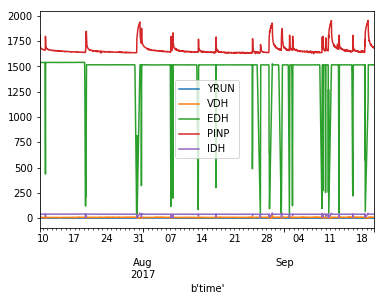

In [32]:
df.plot()

In [84]:
A = df.rolling(60)
res = A.apply(ReverseArrangement)
res *= 4/(61.*60)


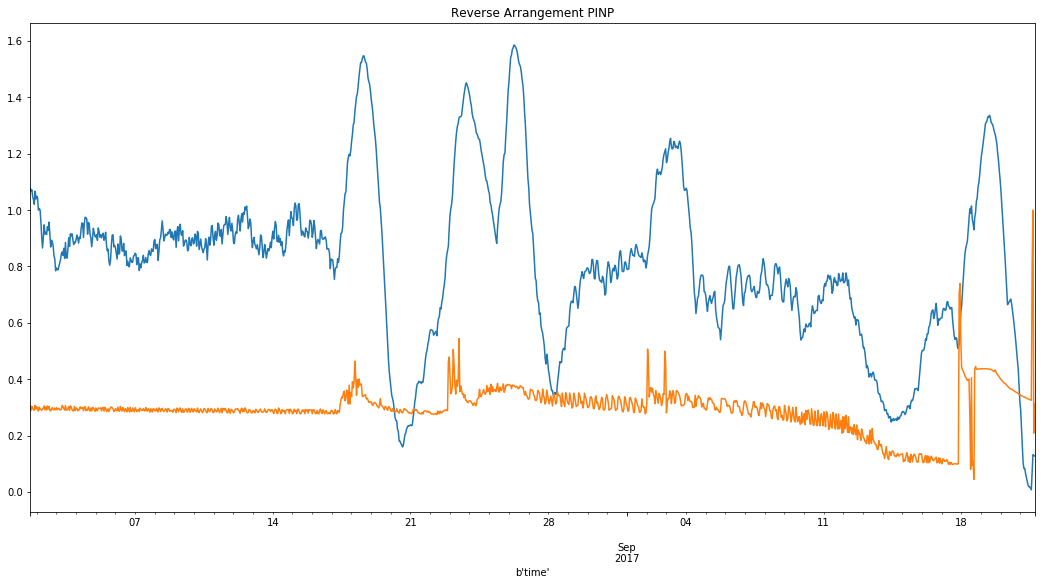

In [134]:
#x = res[res.index > '2017-09-15 15:45:00']
plt.figure(figsize=(18,9))
x = res[res.index > '2017-08-01 15:45:00']
y = df[df.index > '2017-08-01 15:45:00']

x['PINP'].plot()
(y['PINP']/y['PINP'].max()  ).plot()

#plt.ylim([0,2])
plt.title('Reverse Arrangement PINP')


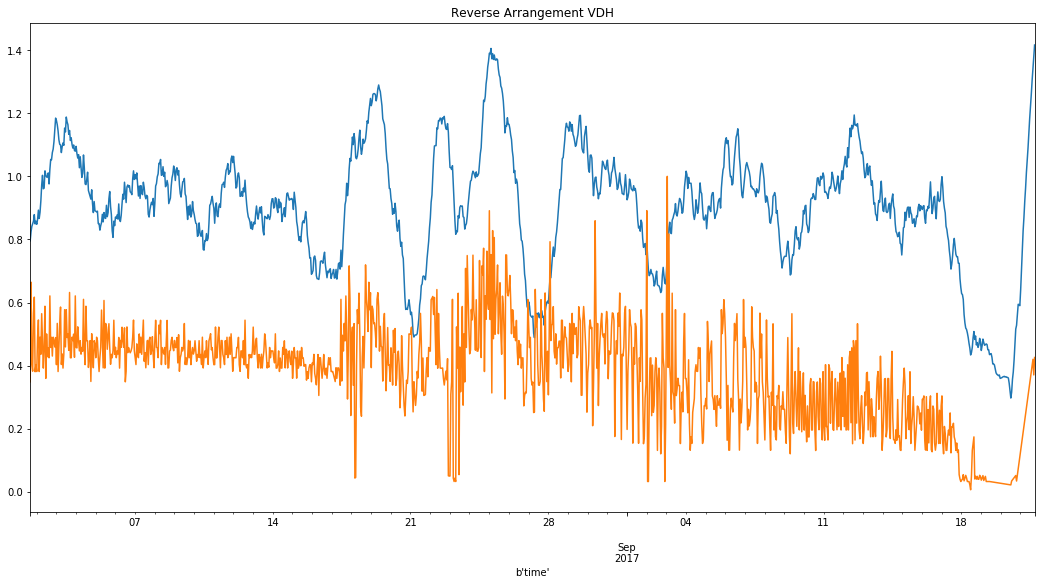

In [135]:
#x = res[res.index > '2017-09-15 15:45:00']
plt.figure(figsize=(18,9))
x = res[res.index > '2017-08-01 15:45:00']
y = df[df.index > '2017-08-01 15:45:00']

x['VDH'].plot()
(y['VDH']/y['VDH'].max()  ).plot()

#plt.ylim([0,2])
plt.title('Reverse Arrangement VDH')
